<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/asia_pgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The "Asia"  graphical model

We illustrate inference in the "Asia" medical diagnosis network.
Network is from http://www.bnlearn.com/bnrepository/#asia.


In [1]:
!pip install -q causalgraphicalmodels
!pip install -q pgmpy

!wget -q https://raw.githubusercontent.com/probml/pyprobml/master/scripts/pyprobml_utils.py
!wget -q https://raw.githubusercontent.com/probml/pyprobml/master/scripts/pgmpy_utils.py
import pyprobml_utils as pml
import pgmpy_utils as pgm

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 337kB 2.9MB/s 


In [3]:
from causalgraphicalmodels import CausalGraphicalModel
import pgmpy
import numpy as np
import pandas as pd
from graphviz import Digraph

import pgmpy_utils as pgm # from pyprobml


# Model

In [ ]:
#from pgmpy.utils import get_example_model
#asia = get_example_model('asia')
# No such file or directory: 'pgmpy/utils/example_models/asia.bif.gz'

In [4]:
#!wget https://raw.githubusercontent.com/d2l-ai/d2l-en/master/d2l/torch.py -q -O d2l.py

!wget https://www.bnlearn.com/bnrepository/asia/asia.bif.gz -q -O asia.bif.gz
!gunzip asia.bif.gz

In [5]:

from pgmpy.readwrite import BIFReader, BIFWriter
reader = BIFReader("asia.bif")
model = reader.get_model()

print("Nodes: ", model.nodes())
print("Edges: ", model.edges())
model.get_cpds()

Nodes:  ['asia', 'tub', 'smoke', 'lung', 'bronc', 'either', 'xray', 'dysp']
Edges:  [('asia', 'tub'), ('tub', 'either'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('bronc', 'dysp'), ('either', 'xray'), ('either', 'dysp')]


[<TabularCPD representing P(asia:2) at 0x7fa3a8c79090>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x7fa3ac547d50>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x7fa3a8c6ff10>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x7fa3a8c7fd90>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x7fa3a8c7f350>,
 <TabularCPD representing P(smoke:2) at 0x7fa3a8c7f210>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x7fa3a8c7f1d0>,
 <TabularCPD representing P(xray:2 | either:2) at 0x7fa3a8c7f7d0>]

In [6]:
for c in model.get_cpds():
  print(c)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+
+------------+------------+-----------+
| smoke      | smoke(yes) | smoke(no) |
+------------+------------+-----------+
| bronc(yes) | 0.6        | 0.3       |
+------------+------------+-----------+
| bronc(no)  | 0.4        | 0.7       |
+------------+------------+-----------+
+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dysp(yes) | 0.9         | 0.8        | 0.7         | 0.1        |
+-----------+-------------+------------+-------------+------------+
| dysp(no)  | 0.1         | 0.2        | 0.3         | 0.9        |
+-----------+-------------+------------+-------------+------------+
+--

In [7]:
asia_cpd = model.get_cpds('asia')
print(asia_cpd)
print(asia_cpd.values)



+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+
[0.01 0.99]


In [8]:
smoking_cpd = model.get_cpds()[5]
print(smoking_cpd)
print(smoking_cpd.values)
smoking_prior_true = smoking_cpd.values[1]

+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+
[0.5 0.5]


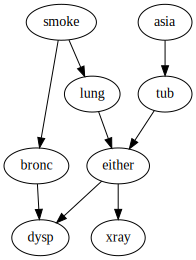

'Digraph.gv.pdf'

In [10]:
asia = CausalGraphicalModel(nodes = model.nodes(), edges=model.edges())

out = asia.draw()
display(out)
out.render()

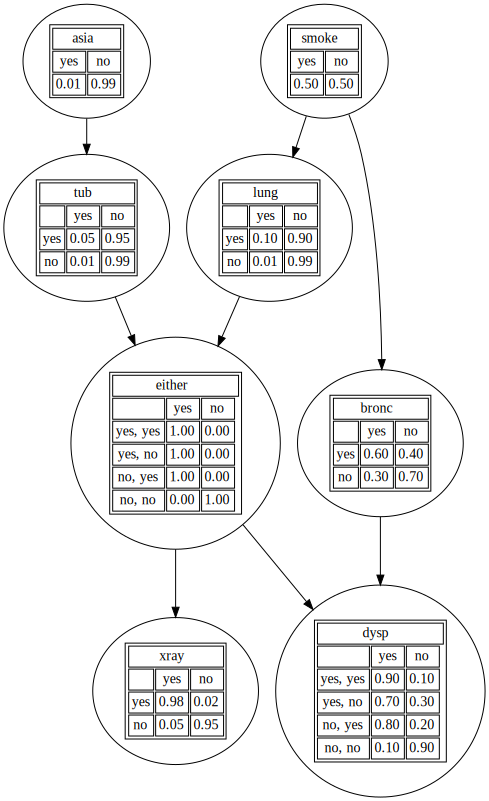

'asia_pgm_with_cpt.pdf'

In [17]:

dot = pgm.visualize_model(model)
display(dot)
dot.render('asia_pgm_with_cpt', format='pdf')

# Inference

In [11]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)



## Prior marginals

In [12]:
evidence = {}
marginals = pgm.get_marginals(model, evidence)
print('\n')
for k, v in marginals.items():
  print(k, v)

asia_prior = model.get_cpds('asia').values
assert np.allclose(asia_prior, marginals['asia'])

Eliminating: either: 100%|██████████| 7/7 [00:00<00:00, 276.66it/s]



asia [0.01 0.99]
tub [0.0104 0.9896]
smoke [0.5 0.5]
lung [0.055 0.945]
bronc [0.45 0.55]
either [0.064828 0.935172]
xray [0.11029004 0.88970996]
dysp [0.4359706 0.5640294]


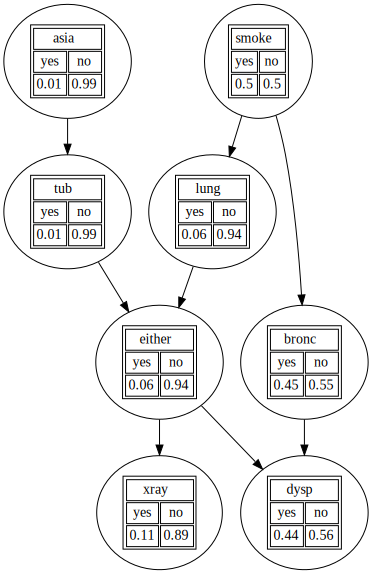

In [13]:
display(pgm.visualize_marginals(model, evidence, marginals))


## Posterior marginals given dsypnea=yes

/usr/local/lib/python3.7/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Eliminating: either: 100%|██████████| 6/6 [00:00<00:00, 290.36it/s]




asia [0.01032495 0.98967505]
tub [0.01884531 0.98115469]
smoke [0.63399688 0.36600312]
lung [0.10275922 0.89724078]
bronc [0.83396734 0.16603266]
either [0.12053583 0.87946417]
xray [0.16209833 0.83790167]
dysp [1. 0.]


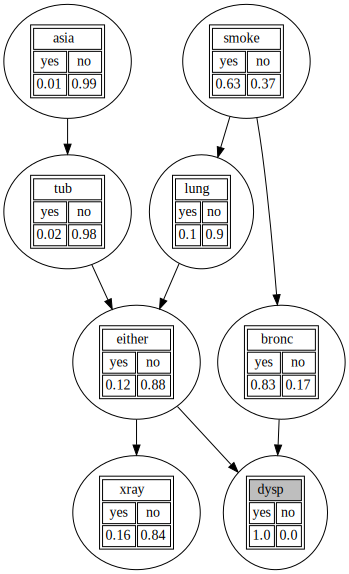

In [14]:

evidence  = {'dysp': 0}
marginals = pgm.get_marginals(model, evidence, infer)
print('\n')
for k, v in marginals.items():
  print(k, v)

display(pgm.visualize_marginals(model, evidence, marginals))



## Posterior marginals given dsypnea=yes, asia=yes

Eliminating: either: 100%|██████████| 5/5 [00:00<00:00, 215.90it/s]




asia [1. 0.]
tub [0.08775096 0.91224904]
smoke [0.62591986 0.37408014]
lung [0.09952515 0.90047485]
bronc [0.81140207 0.18859793]
either [0.18229985 0.81770015]
xray [0.21953886 0.78046114]
dysp [1. 0.]


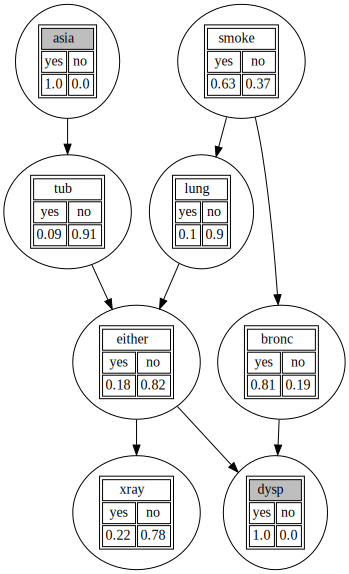

In [15]:
evidence  = {'dysp': 'yes', 'asia': 'yes'}
marginals = pgm.get_marginals(model,  evidence, infer)
print('\n')
for k, v in marginals.items():
  print(k, v)

display(pgm.visualize_marginals(model, evidence, marginals))


## Posterior marginals given dsypnea=yes, asia=yes, smoking=yes

Eliminating: either: 100%|██████████| 4/4 [00:00<00:00, 142.44it/s]




asia [1. 0.]
tub [0.07275954 0.92724046]
smoke [1. 0.]
lung [0.14551908 0.85448092]
bronc [0.86725821 0.13274179]
either [0.21100266 0.78899734]
xray [0.24623248 0.75376752]
dysp [1. 0.]


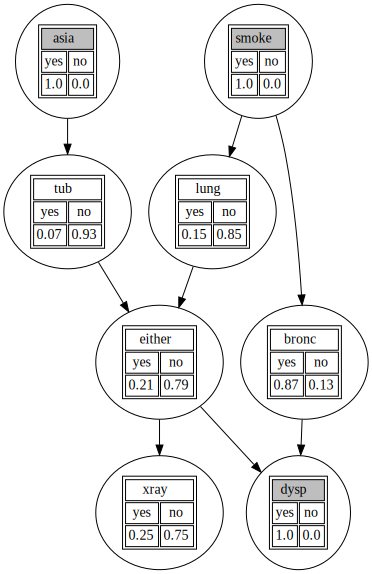

In [16]:
evidence  = {'dysp': 'yes', 'asia': 'yes', 'smoke': 'yes'}
marginals = pgm.get_marginals(model, evidence, infer)
print('\n')
for k, v in marginals.items():
  print(k, v)


display(pgm.visualize_marginals(model, evidence, marginals))
